<IPython.core.display.Javascript object>


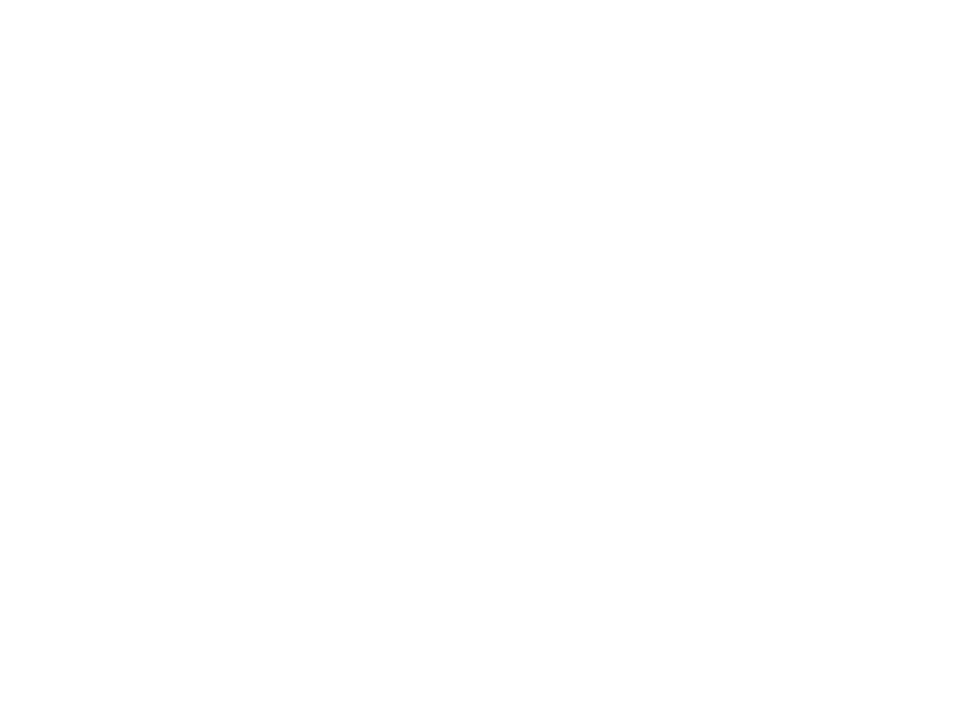

In [1]:
import cartopy.crs as ccrs
# import cartopy.feature as cf
import matplotlib.pyplot as plt
# import numpy as np

# import matplotlib.pyplot as plt
# from matplotlib import cm
import numpy as np
import h5py as h5py
# import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature

%matplotlib notebook

projection = ccrs.PlateCarree()

fig = plt.figure(dpi=150)

ax = plt.axes(projection = projection)

ax.coastlines('10m')
ax.gridlines()
# ax.add_feature(cf.BORDERS)
# ax.add_feature(cf.STATES.with_scale('10m'))

# The extent bounds are specified as an array [[x0, y0], [x1, y1]], 
# where x0 is the left side of the extent, y0 is the top, x1 is the right and y1 is the bottom.
# extent (x0, x1, y0, y1)
# extent = [-180,180, -90,90] # world
# extent = [-90, -30, 20, -60] # south america
# extent = [-74, -31, 5.5, -33] # brazil
# extent = [-53.5, -45, -11, -20] # brazil
# extent = [-48, -47, -16, -17] # brazil
extent = [-44.996, -44.009, -2.805, -1.809] # brazil
# extent = [-90, -30, 20, -60]
# extent = [-100, 30, 0, 80]
# extent = [-87.35, -79.5, 24.1, 30.8]


ax.set_extent(extent, crs=ccrs.PlateCarree())



In [2]:
# First: read the geotiff image with GDAL.
from osgeo import gdal, osr

gdal.UseExceptions()

fname = '/notebooks/resources/T23MNT_20190525T132241_TCI_60m.jp2'

ds = gdal.Open(fname)
data = ds.ReadAsArray()
gt = ds.GetGeoTransform()
proj = ds.GetProjection()

inproj = osr.SpatialReference()
inproj.ImportFromWkt(proj)

print('\n\n## ds ##:\n\n' + str(ds))
print('\n\n## data ##:\n\n' + str(data))
print('\n\n## gt ##:\n\n' + str(gt))
print('\n\n## proj ##:\n\n' + str(proj))
print('\n\n## inproj ##:\n\n' + str(inproj))



## ds ##:

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f8640535bd0> >


## data ##:

[[[  0   0   0 ...  19  18  19]
  [  0   0   0 ...  15  18  16]
  [  0   0   0 ...  17  17  17]
  ...
  [ 13  35  33 ... 255 222 255]
  [ 20  37  34 ... 243 217 188]
  [ 29  37  35 ... 102 139  72]]

 [[  0   0   0 ...  28  26  27]
  [  0   0   0 ...  24  26  24]
  [  0   0   0 ...  25  25  25]
  ...
  [ 25  73  68 ... 255 238 255]
  [ 43  70  70 ... 254 240 222]
  [ 57  75  76 ... 129 168 102]]

 [[  0   0   0 ...  46  44  45]
  [  0   0   0 ...  42  44  42]
  [  0   0   0 ...  44  44  44]
  ...
  [ 18  44  43 ... 248 225 248]
  [ 26  45  44 ... 255 232 220]
  [ 34  44  44 ... 122 150  90]]]


## gt ##:

(499980.0, 60.0, 0.0, 9800020.0, 0.0, -60.0)


## proj ##:

PROJCS["WGS 84 / UTM zone 23S",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UN

In [3]:
projcs = inproj.GetAuthorityCode('PROJCS')
print('\n\n## projcs ##:\n\n' + str(projcs))

# image_projection = ccrs.epsg(projcs)
# print('\n\n## image_projection ##:\n\n' + str(image_projection))



## projcs ##:

32723


In [4]:
img = plt.imread(fname)



## get_extent() ##:

(-44.996, -44.009, -2.805, -1.8090000000000002)


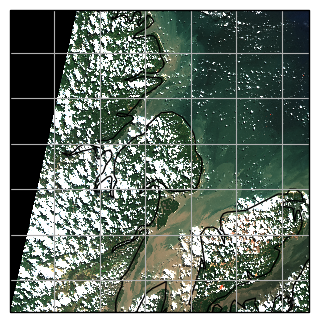

In [5]:
# import cartopy.crs as ccrs
# import cartopy.feature as cf
# import matplotlib.pyplot as plt
# %matplotlib inline

projection = ccrs.PlateCarree()

fig = plt.figure(dpi=100)

ax = plt.axes(projection = projection)

ax.coastlines('10m')
ax.gridlines()

# The extent bounds are specified as an array [[x0, y0], [x1, y1]], 
# where x0 is the left side of the extent, y0 is the top, x1 is the right and y1 is the bottom.
extent = [-44.996, -44.009, -2.805, -1.809] # são luíz do maranhão

ax.set_extent(extent, crs=ccrs.PlateCarree())
img = plt.imread(fname)
ax.imshow(img, extent=extent, origin='upper', transform=ccrs.PlateCarree())

# plt.show()

print('\n\n## get_extent() ##:\n\n' + str(ax.get_extent()))

(array([[-179.95, -179.85, -179.75, ...,  179.75,  179.85,  179.95],
        [-179.95, -179.85, -179.75, ...,  179.75,  179.85,  179.95],
        [-179.95, -179.85, -179.75, ...,  179.75,  179.85,  179.95],
        ...,
        [-179.95, -179.85, -179.75, ...,  179.75,  179.85,  179.95],
        [-179.95, -179.85, -179.75, ...,  179.75,  179.85,  179.95],
        [-179.95, -179.85, -179.75, ...,  179.75,  179.85,  179.95]],
       dtype=float32),
 array([[-89.95, -89.95, -89.95, ..., -89.95, -89.95, -89.95],
        [-89.85, -89.85, -89.85, ..., -89.85, -89.85, -89.85],
        [-89.75, -89.75, -89.75, ..., -89.75, -89.75, -89.75],
        ...,
        [ 89.75,  89.75,  89.75, ...,  89.75,  89.75,  89.75],
        [ 89.85,  89.85,  89.85, ...,  89.85,  89.85,  89.85],
        [ 89.95,  89.95,  89.95, ...,  89.95,  89.95,  89.95]],
       dtype=float32))

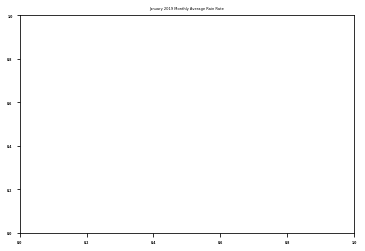

In [7]:
# import matplotlib.pyplot as plt
# from matplotlib import cm
# import numpy as np
# import h5py as h5py
# import cartopy.crs as ccrs
# import cartopy.feature as cfeature
# from cartopy.io.shapereader import Reader
# from cartopy.feature import ShapelyFeature
# %matplotlib inline

hdf5 = '/notebooks/resources/3B-MO.MS.MRG.3IMERG.20190101-S000000-E235959.01.V06A.HDF5'
dataset = h5py.File(hdf5,'r')

precip = dataset['Grid/precipitation'][:]
precip = np.transpose(precip[0])

theLats = dataset['Grid/lat'][:]
theLons = dataset['Grid/lon'][:]

clevs = np.arange(0,1.26,0.125)

x, y = np.float32(np.meshgrid(theLons, theLats))

masked_array = np.ma.masked_where(precip < 0,precip)

cmap = 'nipy_spectral'

plt.title('January 2019 Monthly Average Rain Rate')

font = {'weight' : 'bold', 'size' : 3}

plt.rc('font', **font)

cs = ax.contourf(x, y, precip, clevs, transform=ccrs.PlateCarree(), cmap=cmap)
# cs = ax.contourf(x, y, precip, transform=ccrs.PlateCarree(), cmap=cmap)

sm = plt.cm.ScalarMappable(cmap=cmap,norm=plt.Normalize(0,1))
sm._A = []
plt.colorbar(sm, ax=ax, label='mm/h', shrink=0.5)

# plt.show()

In [18]:
x[1500]
y[1]

array([-89.85, -89.85, -89.85, ..., -89.85, -89.85, -89.85], dtype=float32)

In [19]:
theLons

array([-179.95, -179.85, -179.75, ...,  179.75,  179.85,  179.95],
      dtype=float32)

In [20]:
theLats

array([-89.95, -89.85, -89.75, ...,  89.75,  89.85,  89.95], dtype=float32)

In [27]:
# [-44.996, -44.009, -2.805, -1.809]

condition = (theLats > -44 < -45)
extracted = np.extract(condition, theLats)

print(theLats[theLats > 0.5])
print(theLats[condition])
print(extracted)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()